# Iris -dataset assignment
## Let's learn neural networking with the iris -dataset
First I prepare the dataset by importing it and formatting it so it suits my future model. Then I use keras to create a model and train it.

In [6]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

# Dataset Preparation

### Import dataset from the web

In [7]:
# prepare dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
print(dataset.head())
print(dataset.shape)

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


### Pre-preparation
I shuffle the dataset and one-hot encode the classifications

In [8]:
# I do not use np.random.shuffle(), because then I would have to convert the dataset to a numpy array
# and then back to a pandas dataframe, which is not very efficient
dataset = dataset.sample(frac=1).reset_index(drop=True)

# one-hot encode the class labels
dataset['class'] = pd.Categorical(dataset['class']).codes

# split the dataset into input and output features
X = pd.DataFrame(dataset.drop('class', axis=1))
Y = to_categorical(dataset['class'])

print(X.head())
print(Y[:5])


   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.7           1.5          0.4
1           6.7          3.3           5.7          2.5
2           5.4          3.4           1.5          0.4
3           6.3          2.9           5.6          1.8
4           7.2          3.0           5.8          1.6
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Actual modeling with Keras
1. Initialize the model with input layer of 4 features
2. Create a hidden layer with 32 neurons with a non-linear ReLU activation function
3. Final output layer with 3 neurons (3 Iris classifications)

Optimizer is the Adam optimizer. I started with the RMSProp, but Adam gave better results.

Summary of the model's architechture and training is printed and graphed below.

In [9]:
# fit

model = Sequential([
    Input(shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

optimizer = keras.optimizers.Adam(
    learning_rate=0.0003
)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

model.fit(X, Y, 
          epochs=1000, 
          batch_size=16, 
          verbose=2, 
          validation_split=0.2,
          shuffle=True, 
          callbacks=[early_stopping])



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 - 2s - 261ms/step - accuracy: 0.0250 - loss: 1.6204 - val_accuracy: 0.1667 - val_loss: 1.4911
Epoch 2/1000
8/8 - 0s - 17ms/step - accuracy: 0.1500 - loss: 1.5546 - val_accuracy: 0.3667 - val_loss: 1.4312
Epoch 3/1000
8/8 - 0s - 16ms/step - accuracy: 0.2500 - loss: 1.4952 - val_accuracy: 0.4000 - val_loss: 1.3744
Epoch 4/1000
8/8 - 0s - 17ms/step - accuracy: 0.2917 - loss: 1.4369 - val_accuracy: 0.4000 - val_loss: 1.3226
Epoch 5/1000
8/8 - 0s - 18ms/step - accuracy: 0.3083 - loss: 1.3824 - val_accuracy: 0.4000 - val_loss: 1.2761
Epoch 6/1000
8/8 - 0s - 18ms/step - accuracy: 0.3167 - loss: 1.3371 - val_accuracy: 0.4000 - val_loss: 1.2326
Epoch 7/1000
8/8 - 0s - 17ms/step - accuracy: 0.3167 - loss: 1.2861 - val_accuracy: 0.4000 - val_loss: 1.1967
Epoch 8/1000
8/8 - 0s - 19ms/step - accuracy: 0.3167 - loss: 1.2447 - val_accuracy: 0.4000 - val_loss: 1.1636
Epoch 9/1000
8/8 - 0s - 16ms/step - accuracy: 0.3167 - loss: 1.2068 - val_accuracy: 0.4000 - val_loss: 1.1355
Epoch 10/

### GRAPHING

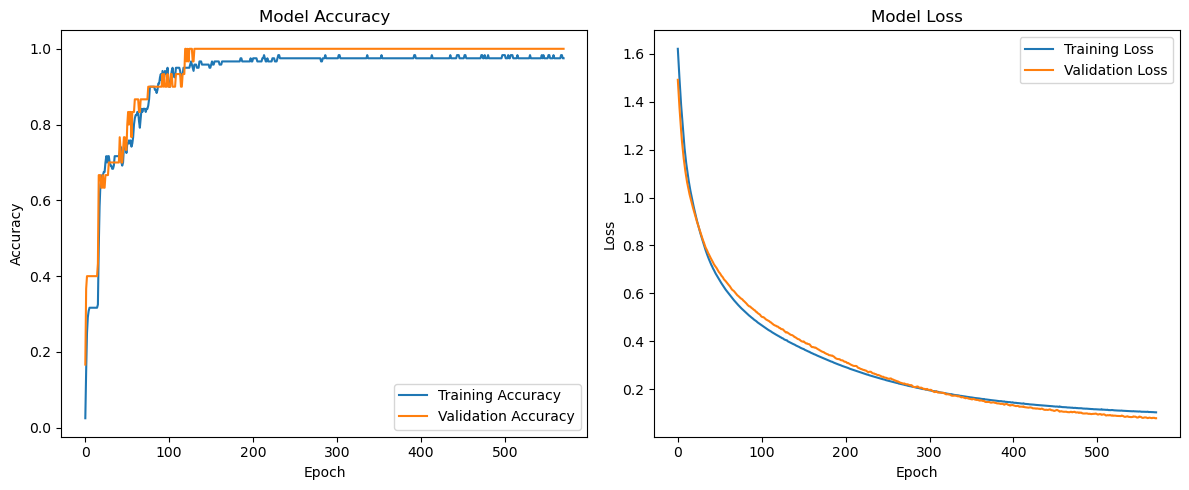

In [10]:
# Extract training history
history = model.history.history

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot accuracy metrics
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss metrics
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Analysis
Model achieves the set 0.95 accuracy values for both training and validation.
The model actually stopped training before the epoch limit because of the early_stopping to reduce overfitting.

Improvements to Accuracy and reducements to Loss start quickly and reduce over time, but generally running for a longer time lead to better learning. Over time this would lead to overlearning, but having a lower learning rate makes the model learn more carefully, and setting early stopping stops the learning before the model overfits.